In [58]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import SpectralClustering
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


1) Загрузить из наборов данных Scikit-learn набор «Ирисы Фишера» (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [35]:
iris = datasets.load_iris()

2) Ознакомиться с алгоритмами классификации (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) и кластеризации (https://scikit-learn.org/stable/modules/clustering.html, https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). \
3) Провести кластеризацию набора алгоритмом k-ближайших соседей. Визуализировать результат.


In [59]:
X, Y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [60]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train[:, :2], Y_train)

KNeighborsClassifier(n_neighbors=3)

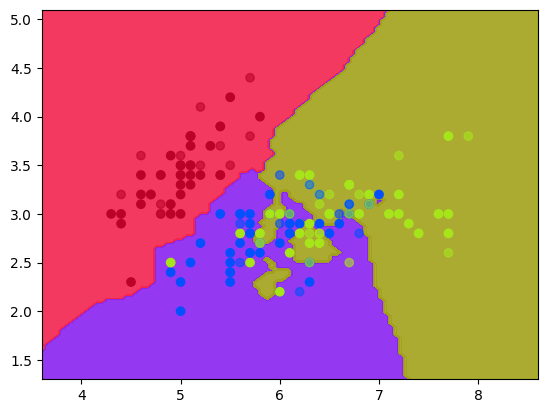

In [61]:
cm = ListedColormap(["#f2234e", "#8923f0", "#a2a21b"])
cm_dot = ListedColormap(["#bc0128", "#0450ff", "#a7e51b"])

DecisionBoundaryDisplay.from_estimator(
            neigh, X[:,:2], cmap=cm, alpha=0.9, eps=0.7
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_dot)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_dot, alpha=0.6)

4) Провести классификацию набора алгоритмом «случайный лес». Визуализировать результат.

In [62]:
fc = RandomForestClassifier(n_estimators=100)
fc.fit(X_train[:, :2], Y_train)

RandomForestClassifier()

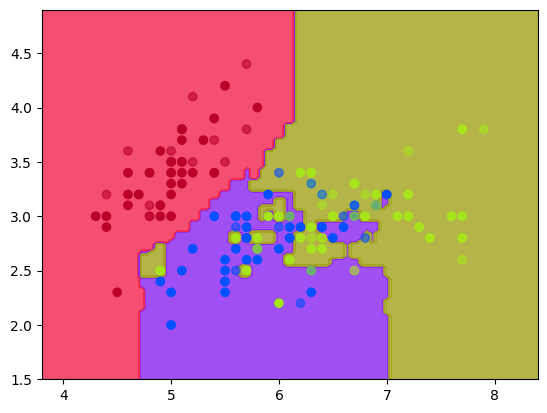

In [63]:
DecisionBoundaryDisplay.from_estimator(
            fc, X[:,:2], cmap=cm, alpha=0.8, eps=0.5
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_dot)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_dot, alpha=0.6)

5) Провести классификацию набора машинами опорных векторов (SVM). Визуализировать результат.

In [64]:
svc = SVC(gamma=1)
svc.fit(X_train[:, :2], Y_train)

SVC(gamma=1)

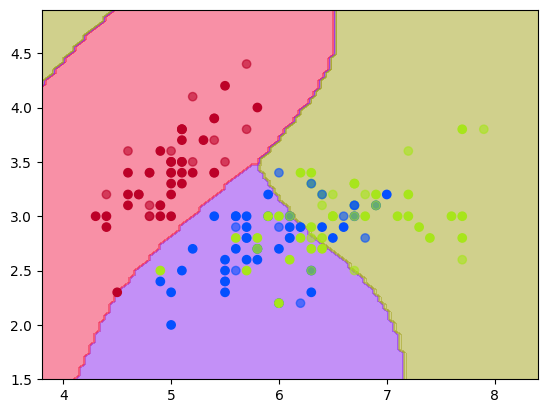

In [65]:
DecisionBoundaryDisplay.from_estimator(
            svc, X[:,:2], cmap=cm, alpha=0.5, eps=0.5
        )
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_dot)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_dot, alpha=0.6)

6) Провести кластеризацию набора алгоритмом k-средних. Визуализировать результат.

In [66]:
km = KMeans(n_clusters=3, random_state=3)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=3)

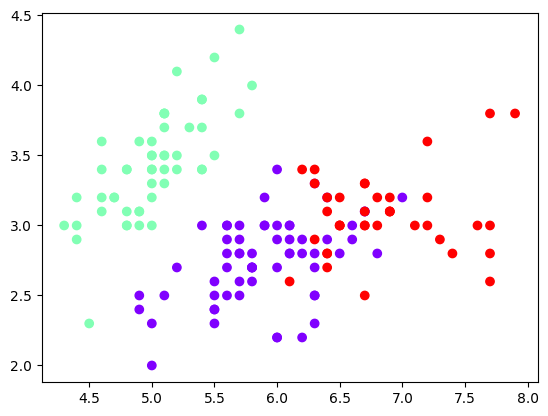

In [67]:
label = km.labels_
plt.scatter(X[:, 0], X[:, 1], c=label, cmap='rainbow')

7) Провести иерархическую кластеризацию методом Уорда. Визуализировать дендрограмму.

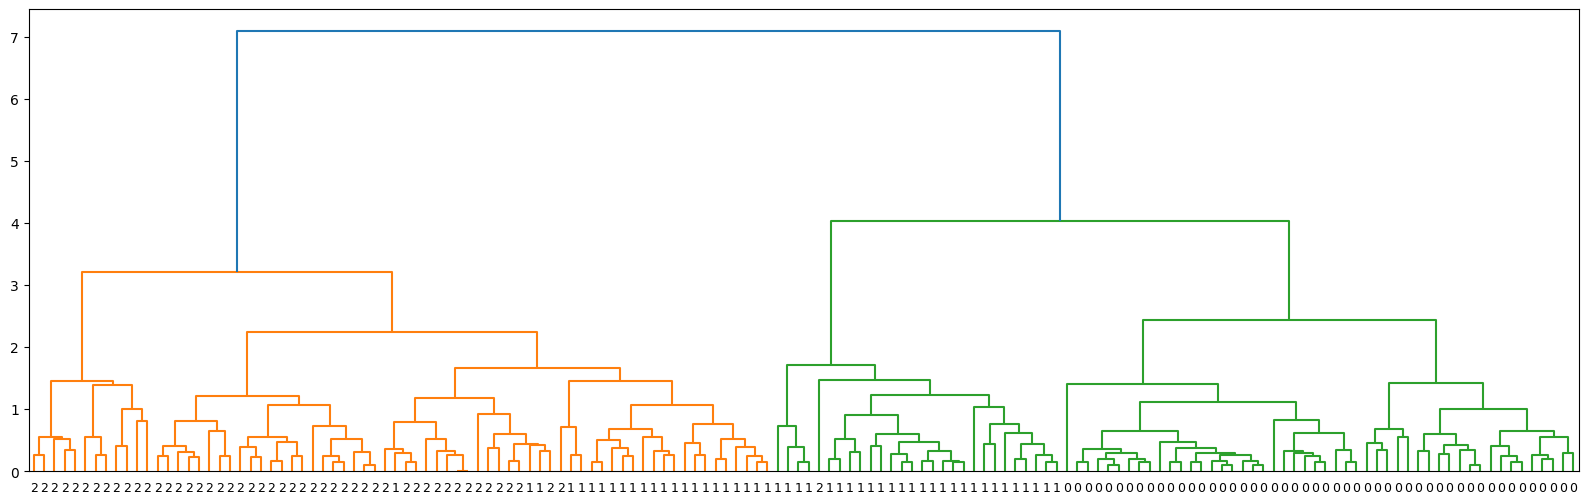

In [68]:
clusters = hierarchy.linkage(X, method="complete")
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)

8) Провести спектральную кластеризацию. Визуализировать результат.

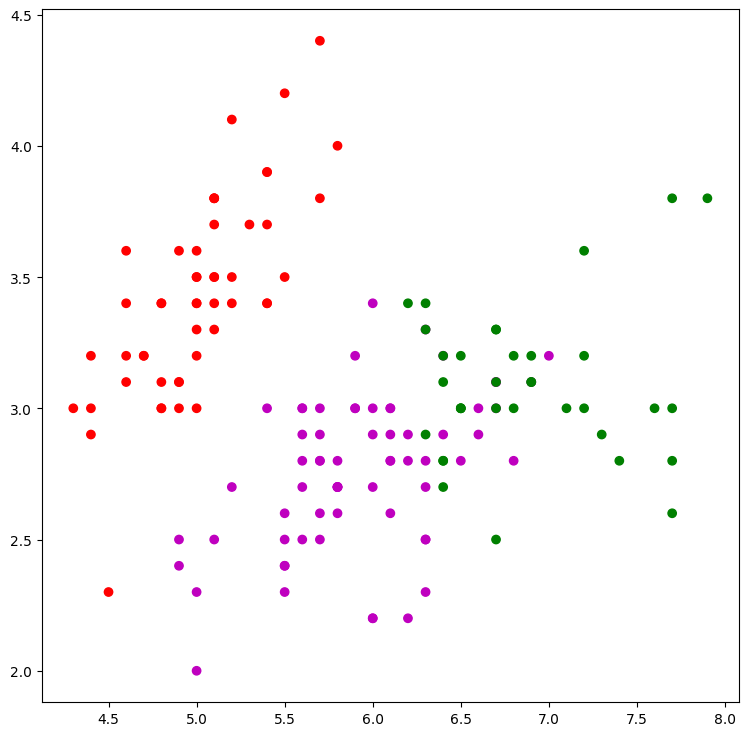

In [69]:
spectral = SpectralClustering(n_clusters = 3)
labels = spectral.fit_predict(X)
colours = ['r','g','m']
cvec = [colours[label] for label in labels]
plt.figure(figsize =(9, 9))
plt.scatter(X[:,0], X[:,1], c=cvec)